# **Importing Library**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

In [3]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.violinplot(x='quality',y=i,data=df)
  plt.show()

In [9]:
def best_skew(dummy_data):
  df2=pd.DataFrame()
  df3=pd.DataFrame()
  i='dummy'
  if dummy_data.min()<0:
    dummy_data[i]=dummy_data[i]-dummy_data[i].min()+1

  alpha=np.abs(dummy_data.skew())
  beta=i

  df2[i+'_log']=np.log(dummy_data)
  pplot(df2,i+'_log')
  if alpha>np.abs(df2[i+'_log'].skew()):
    alpha=np.abs(df2[i+'_log'].skew())
    beta=(i+'_log')
  

  df2[i+'_Boxcox'],para=stat.boxcox(dummy_data)
  pplot(df2,i+'_Boxcox')
  if alpha>np.abs(df2[i+'_Boxcox'].skew()):
    alpha=np.abs(df2[i+'_Boxcox'].skew())
    beta=(i+'_Boxcox')
  

  df2[i+'_sqrt']= dummy_data**(1/2)
  pplot(df2,i+'_sqrt')
  if alpha>np.abs(df2[i+'_sqrt'].skew()):
    alpha=np.abs(df2[i+'_sqrt'].skew())
    beta=(i+'_sqrt')
  

  df2[i+'_exponential']= dummy_data**(1/1.2)
  pplot(df2,i+'_exponential')
  if alpha>np.abs(df2[i+'_exponential'].skew()):
    alpha=np.abs(df2[i+'_exponential'].skew())
    beta=(i+'_exponential')
  

  df2[i+'_reciprocal']= 1/dummy_data
  pplot(df2,i+'_reciprocal')
  if alpha>np.abs(df2[i+'_reciprocal'].skew()):
    alpha=np.abs(df2[i+'_reciprocal'].skew())
    beta=(i+'_reciprocal')
    
  print(beta)
  df3[i]=df2[beta]
    

    
  return(df3)
 

In [10]:
df_stand=pd.DataFrame()

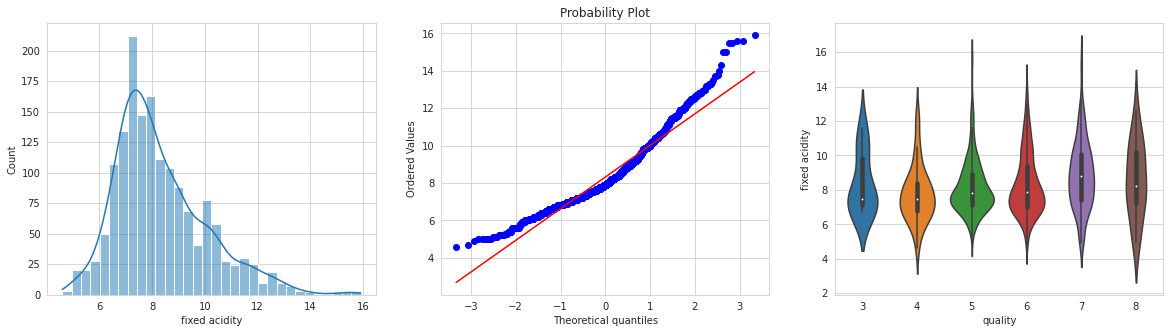

In [11]:
pplot(df,'fixed acidity')


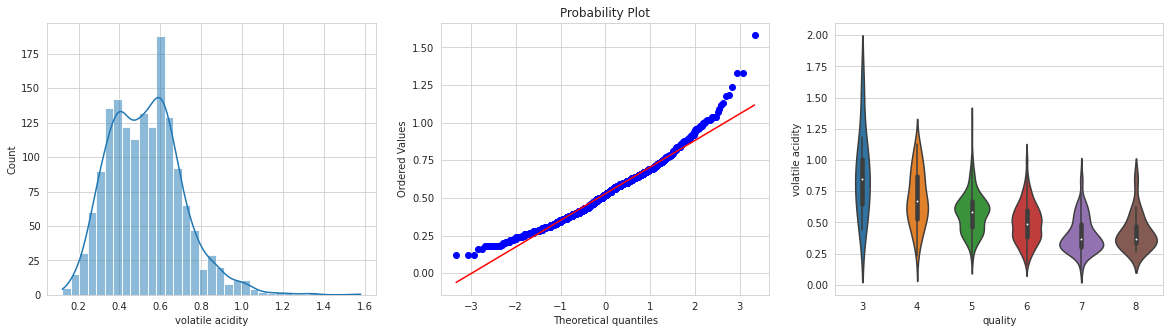

In [12]:
pplot(df,'volatile acidity')


Volatile acidity is inversly proposnal to qyality

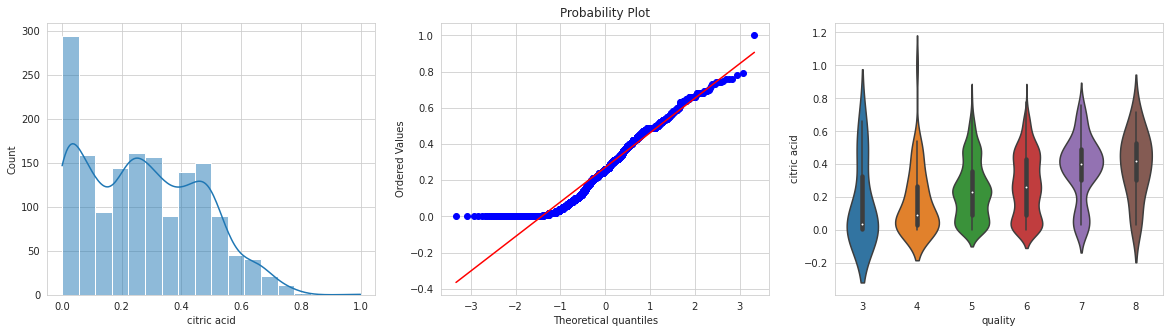

In [13]:
pplot(df,'citric acid')


**citric acid is directly related to quality**

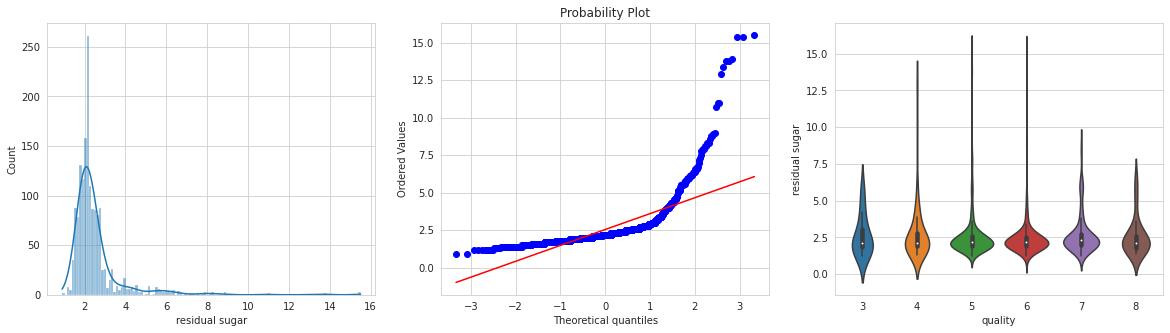

In [14]:
pplot(df,'residual sugar')


No spesific relation b/w residual sugar and quality

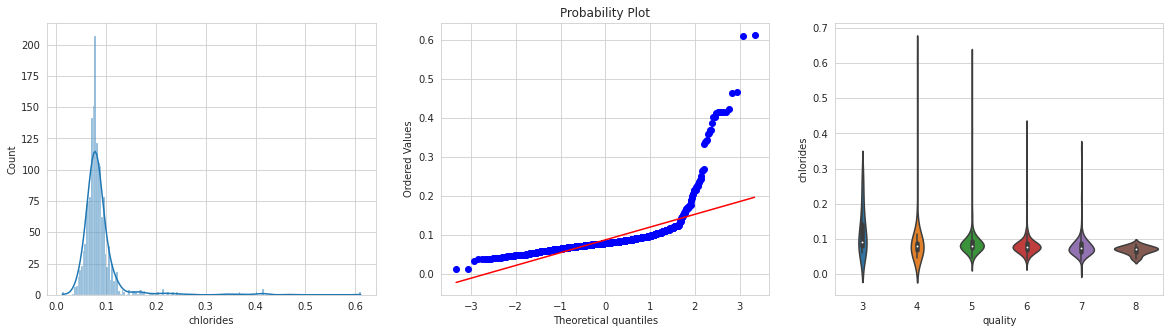

In [15]:
pplot(df,'chlorides')


No spesific relation b/w cloride and quality

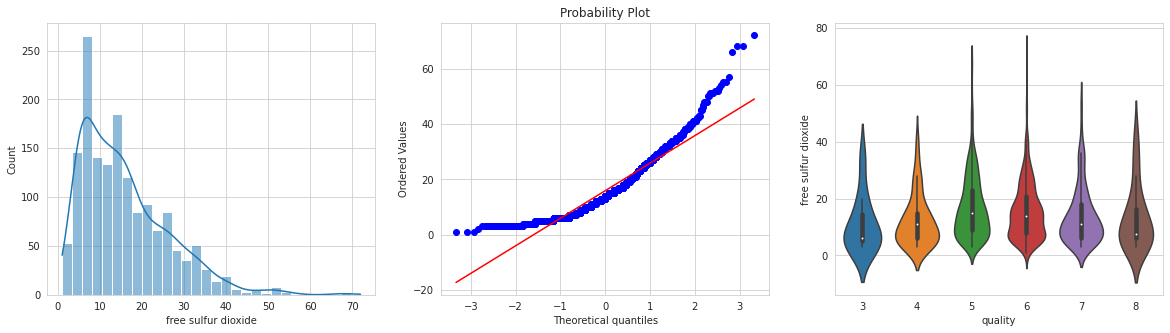

In [16]:
pplot(df,'free sulfur dioxide')


**free sulfur dioxide is quadrature related to quality**

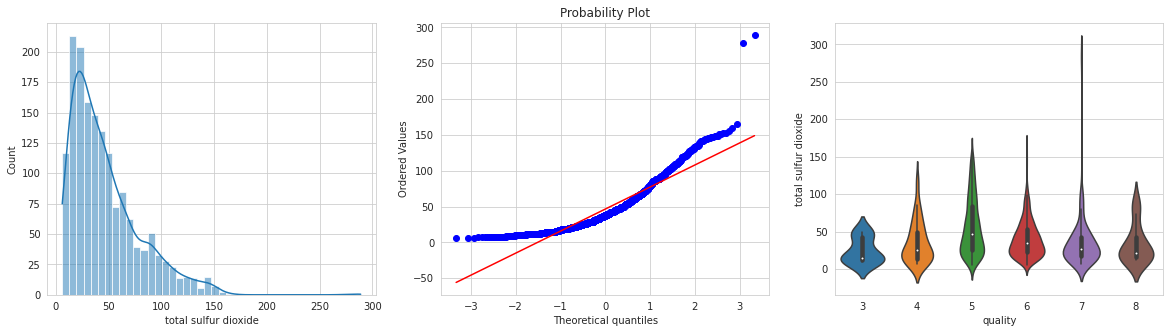

In [17]:
pplot(df,'total sulfur dioxide')


**total sulfur dioxide is quadrature related to quality**

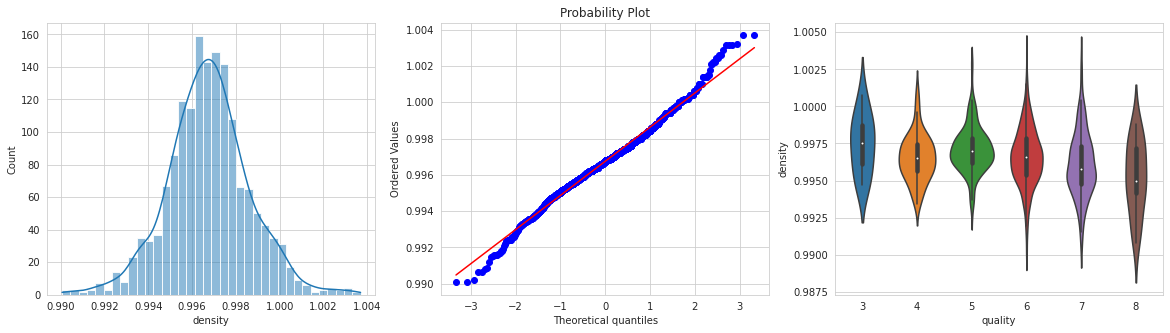

In [18]:

pplot(df,'density')

density is invesly related to quality

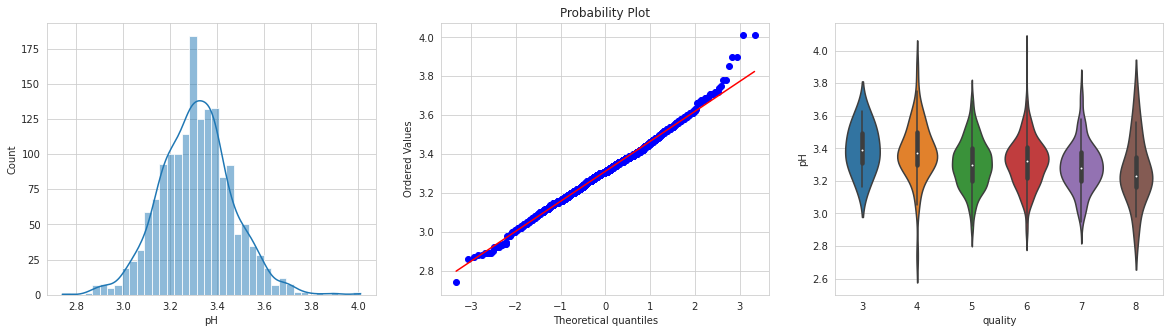

In [19]:
pplot(df,'pH')

No spesific relation b/w PH and quality

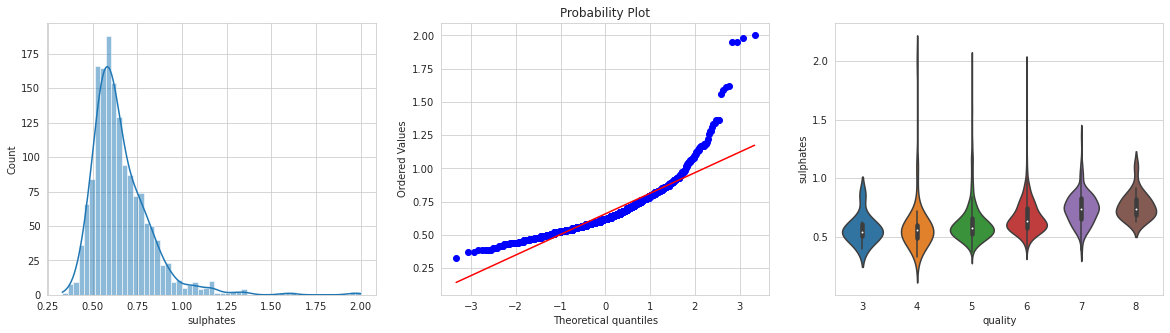

In [20]:
pplot(df,'sulphates')

Exponencial increasing relation b/W Sulphate and  quality

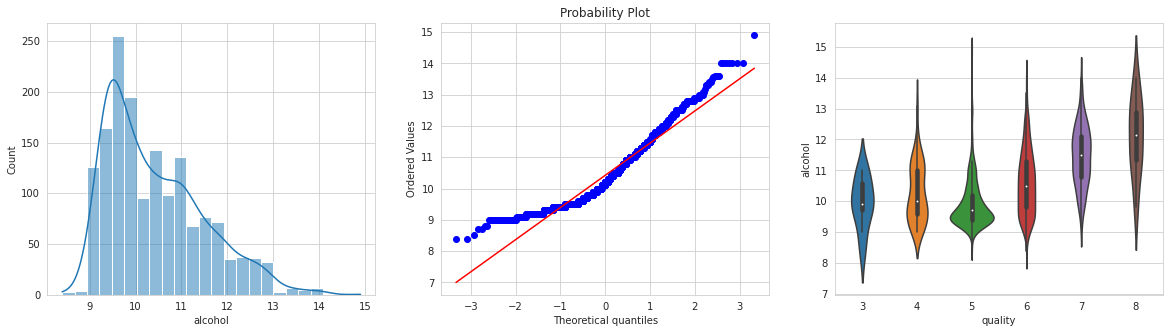

In [21]:
pplot(df,'alcohol')

quality and alcohal are directly proposnal 

Datas are needed to be Normalized 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


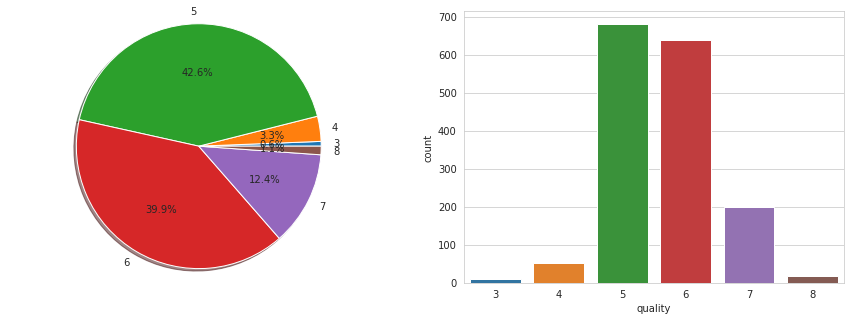

In [22]:
labels = df['quality'].astype('category').cat.categories.tolist()
counts = df['quality'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.xlabel('quality')
sns.countplot(x='quality',data=df,ax=ax2)
print(df['quality'].value_counts())
plt.show()

Dataset is highly imbalance 

In [23]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

In [24]:
x=df.drop('quality',axis=1)

In [25]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in x.columns:
 pt1=(x[i]-x[i].min()+0.0001)
 pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)


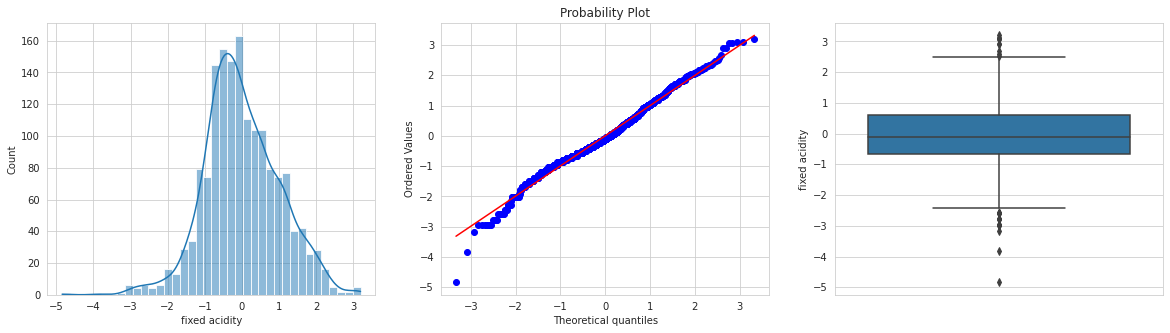

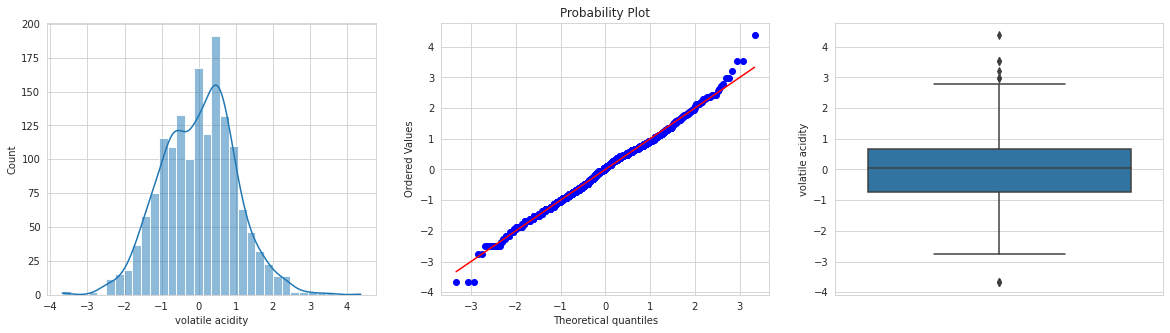

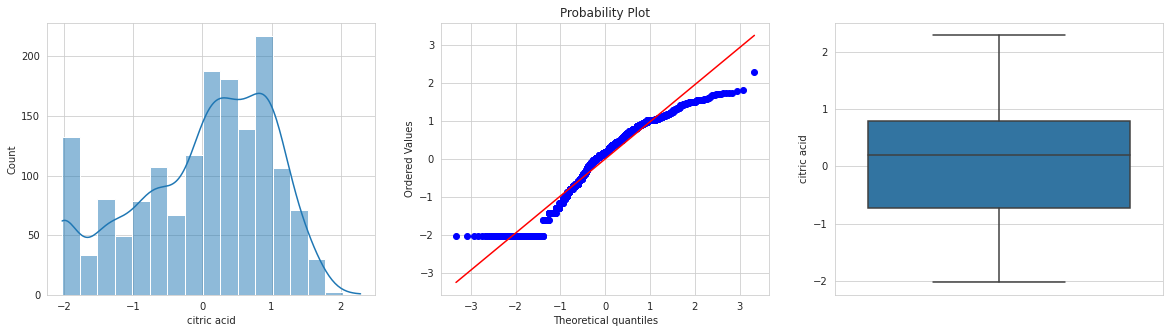

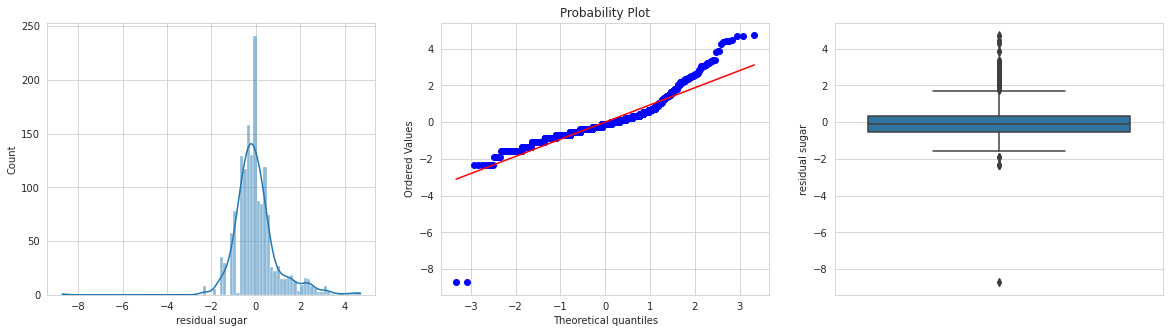

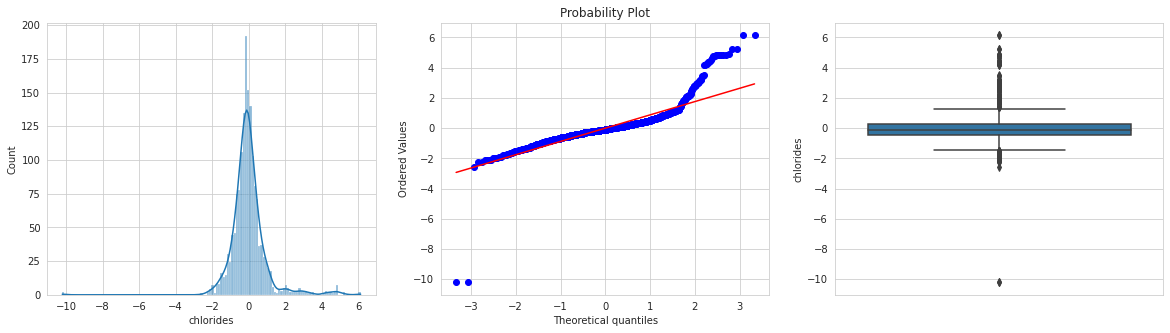

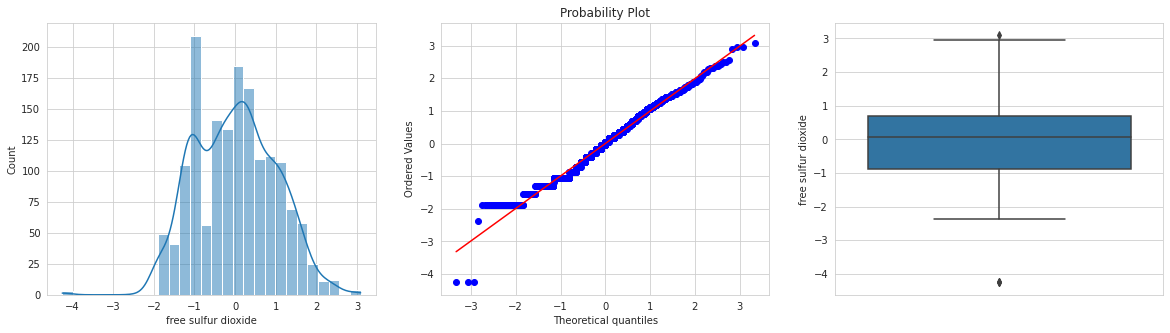

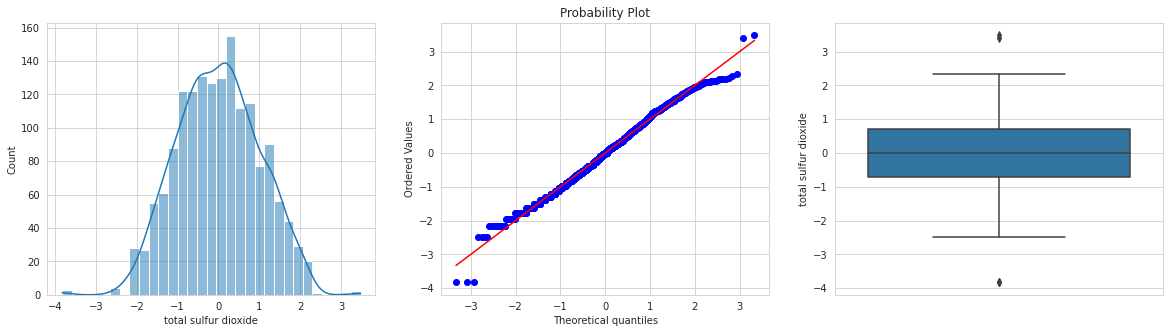

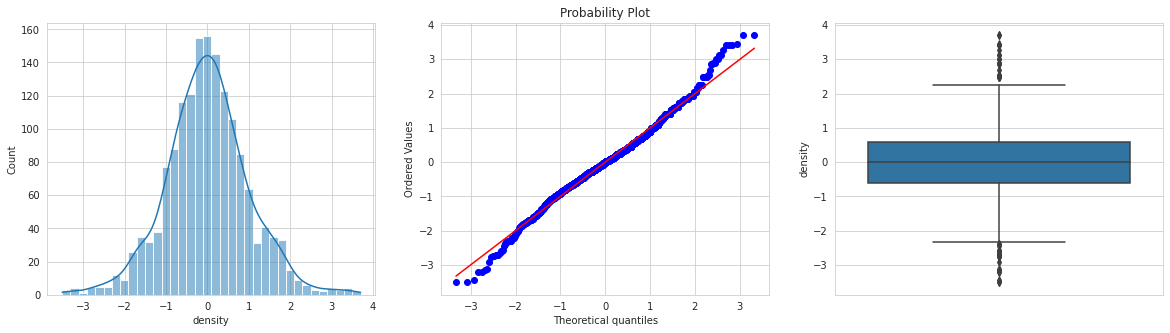

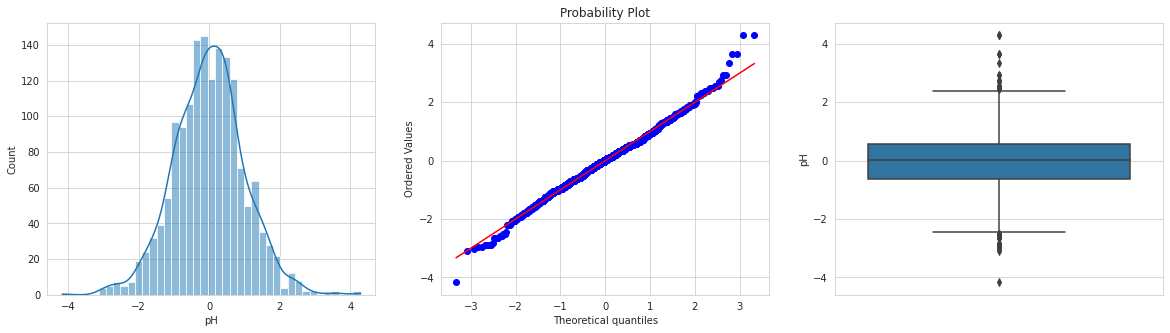

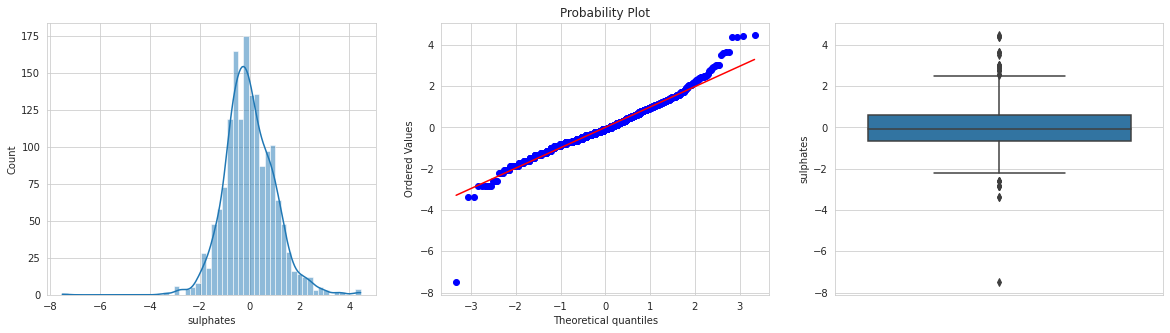

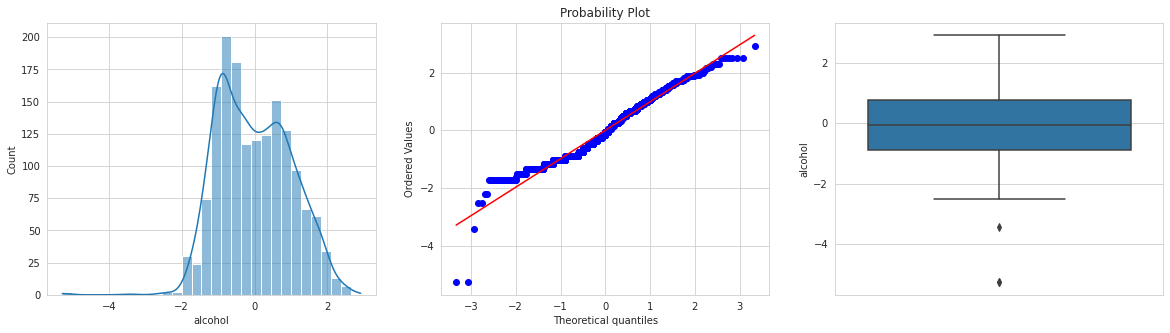

In [26]:
pt1=pd.DataFrame(pt1,columns=x.columns)
pd.concat([pt1,df.quality],axis=1)
for i in x.columns:
  pplot(pt1,i)

data set has been standardized and outlier has been removed but will not remove the outlier as it will remove the information about minority sample

In [27]:
y=df.quality

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

s=SelectKBest(f_classif,k=11).fit(x,y)


In [29]:
pd.DataFrame([x.columns,s.scores_,s.pvalues_]).T.sort_values(by=1)

,0,1,2
3,residual sugar,1.05337,0.384619
8,pH,4.34176,0.000628439
5,free sulfur dioxide,4.75423,0.000257083
4,chlorides,6.03564,1.52654e-05
0,fixed acidity,6.28308,8.79397e-06
7,density,13.3964,8.12439e-13
2,citric acid,19.6907,4.42109e-19
9,sulphates,22.2734,1.22589e-21
6,total sulfur dioxide,25.4785,8.5336e-25
1,volatile acidity,60.914,3.32647e-58


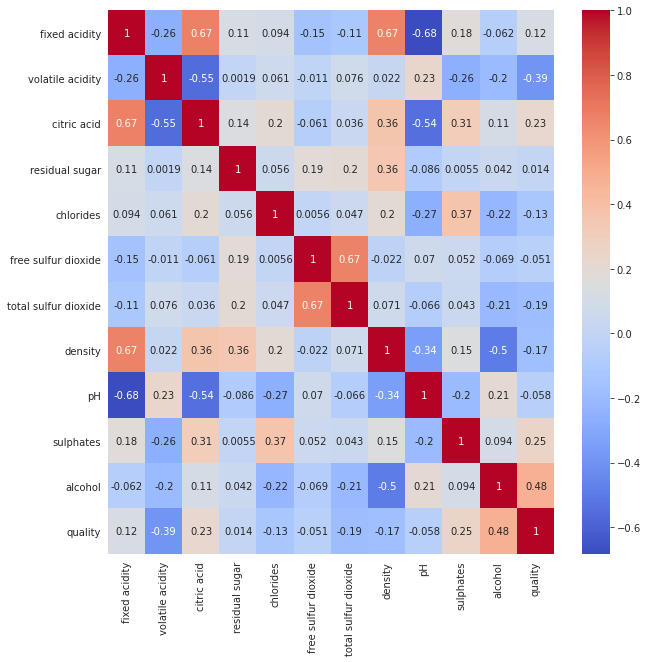

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

Features are multicollinear but droping them will cause loss in information we will cheak it by PCA variance  

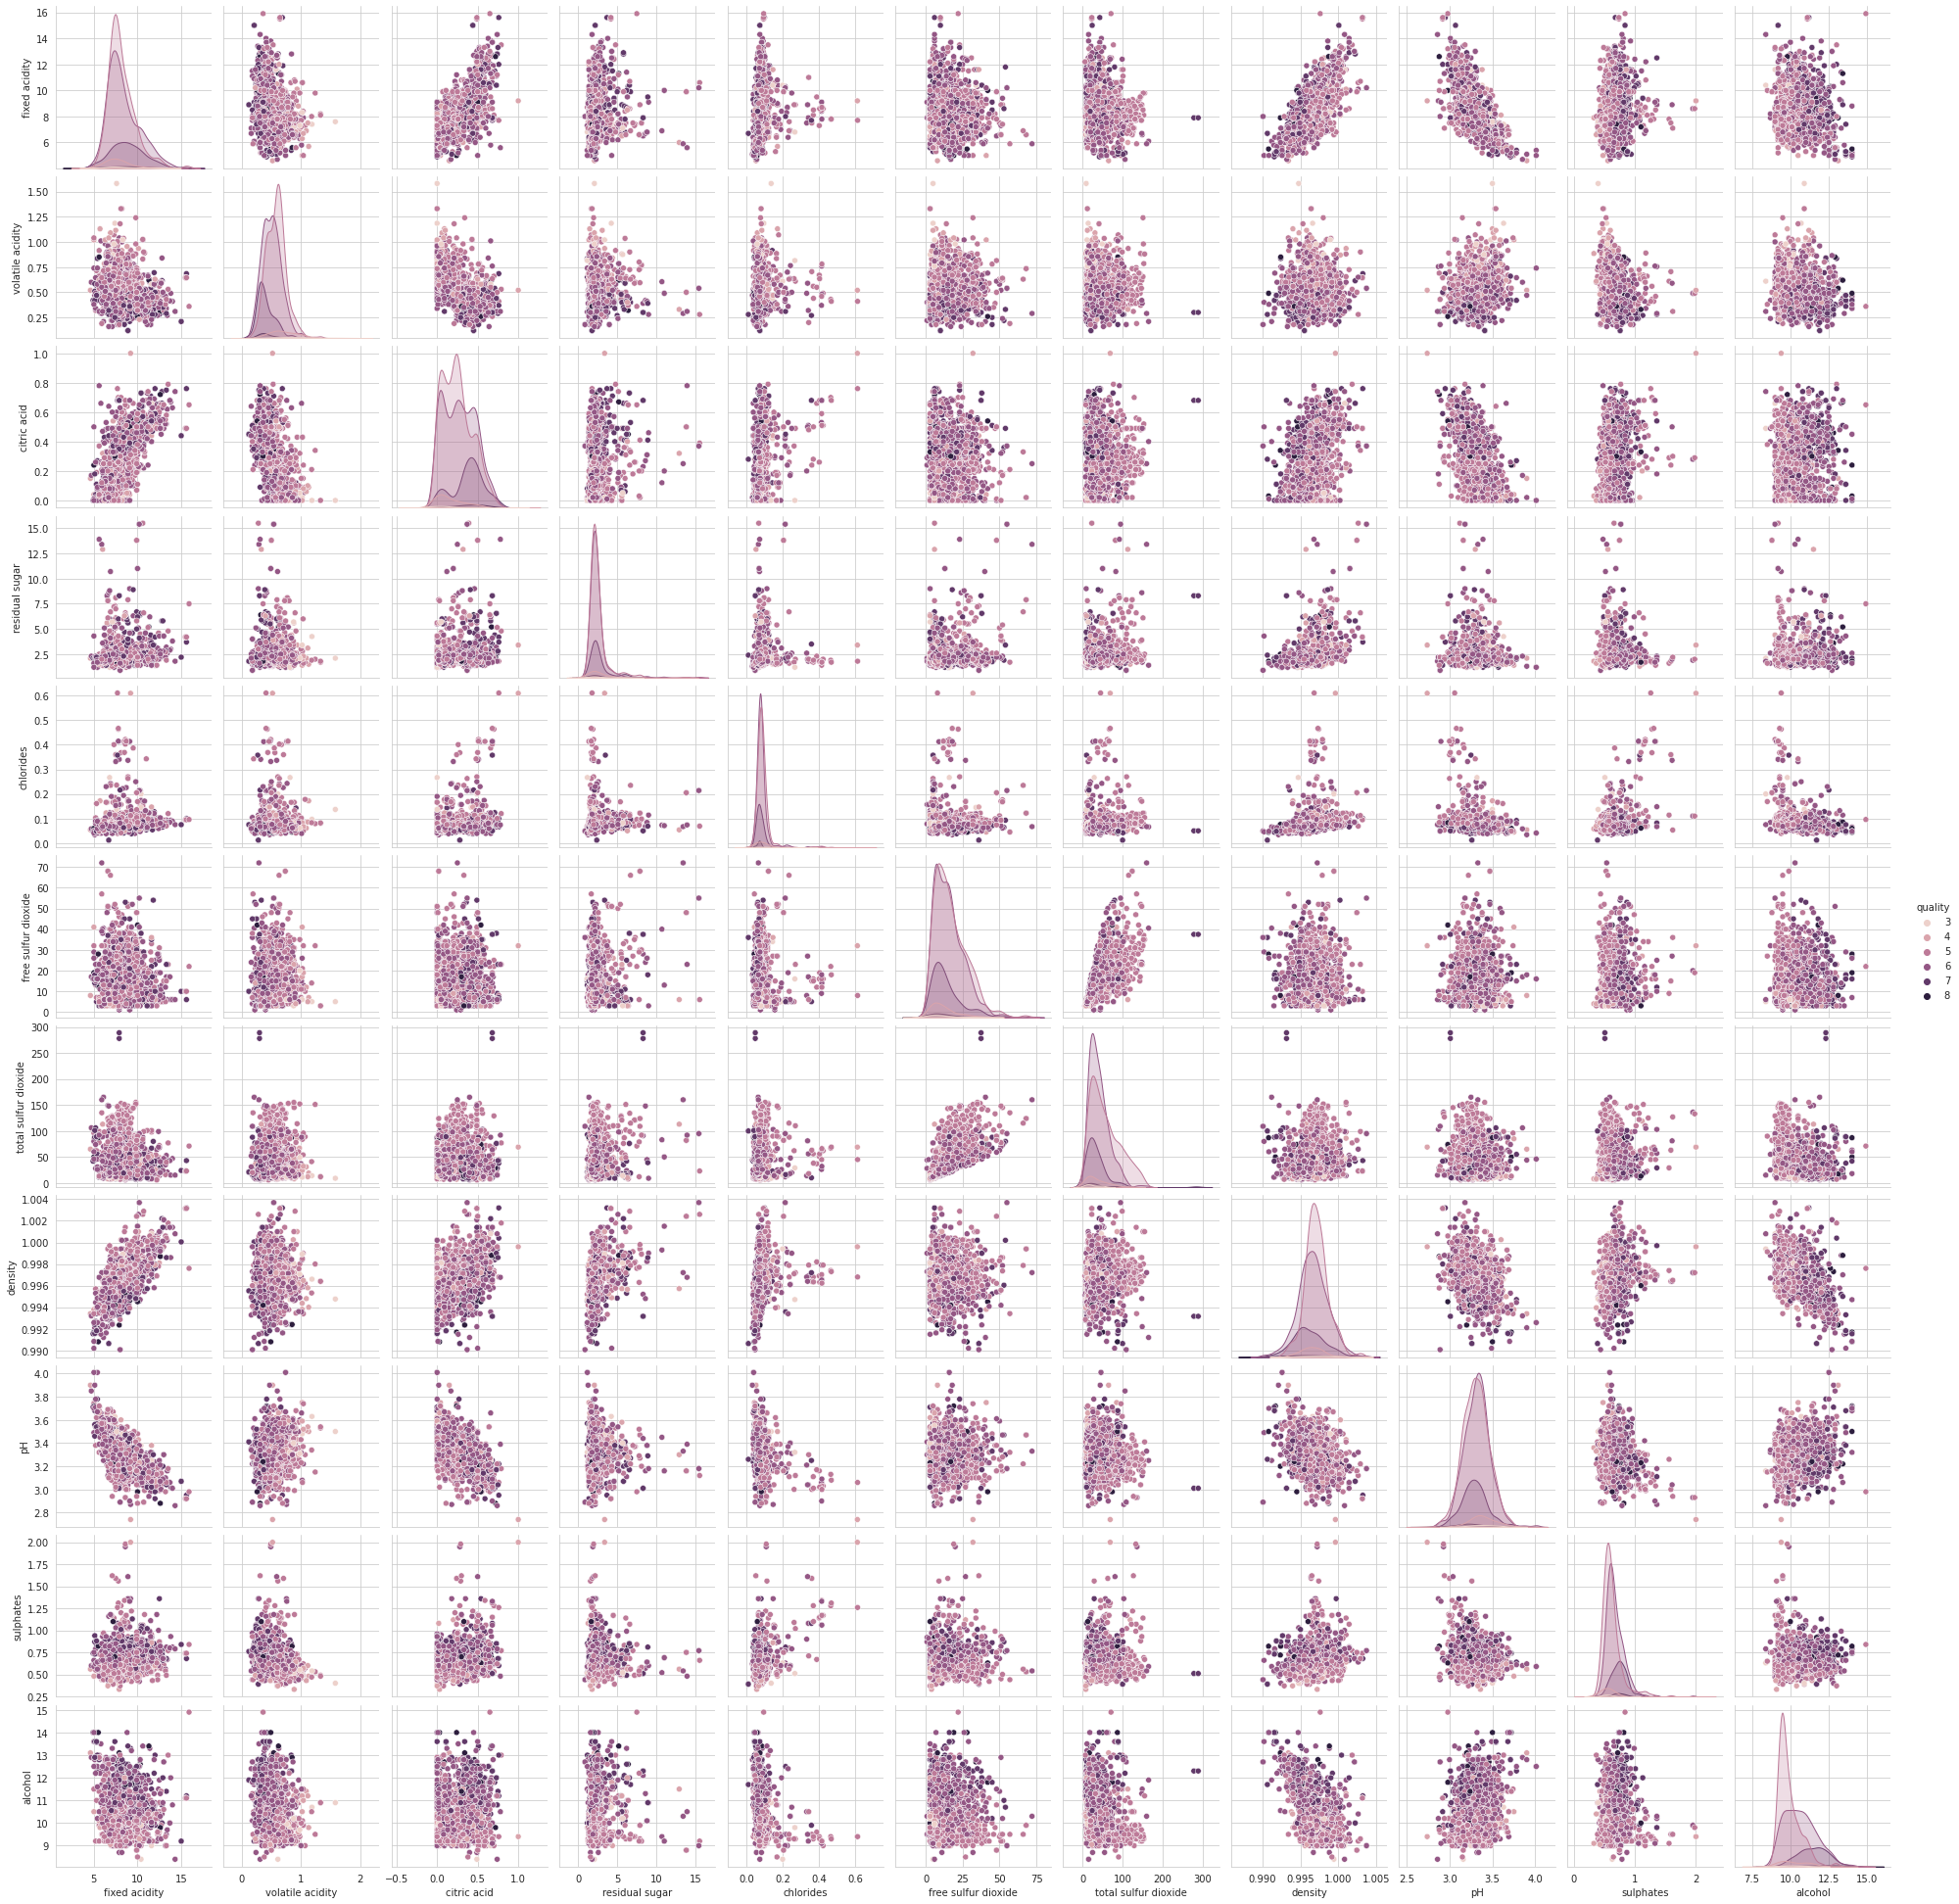

In [31]:
sns.pairplot(df,hue='quality')

linearly not separable

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler as SS
x_scaler=SS().fit_transform(pt1)
vif=pd.DataFrame()
vif['vif']=[VIF(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif.sort_values(by='vif')

,vif,feature
9,1.378271,sulphates
4,1.380817,chlorides
3,1.758433,residual sugar
1,1.836731,volatile acidity
2,2.616851,citric acid
10,2.629070,alcohol
5,2.667040,free sulfur dioxide
6,3.043725,total sulfur dioxide
8,3.297341,pH
7,6.255190,density


From Anova analysis it is clear that residual sugar is an unwanted feature

In [33]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(pt1,y,test_size=0.3,random_state=123)

In [34]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [90]:
from imblearn.over_sampling import BorderlineSMOTE


over = BorderlineSMOTE()

x_train, y_train = over.fit_resample(pt1, y)

x_train_scaler=ss.transform(x_train)

In [91]:
x_train=pd.DataFrame(x_train,columns=x_test.columns)

To balance the daata set i have used Borderline SMOTE

In [92]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components = 11)
pca_test.fit(x_train_scaler)
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(11))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.394113,0.394113
1,0.569589,0.175476
2,0.714996,0.145407
3,0.809753,0.094756
4,0.869815,0.060063
5,0.911260,0.041445
6,0.942363,0.031103
7,0.965876,0.023513
8,0.984902,0.019026
9,0.994623,0.009722


## **Logistic Regression**

In [93]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
lr_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  3   5   5   1   1   1]
 [  5  24 131  41   8   5]
 [  3  12  46  61  41  22]
 [  0   2   1   6  29  20]
 [  0   0   0   0   1   4]]
0.48333333333333334
              precision    recall  f1-score   support

           3       0.15      1.00      0.27         2
           4       0.12      0.31      0.17        16
           5       0.72      0.61      0.66       214
           6       0.56      0.33      0.41       185
           7       0.36      0.50      0.42        58
           8       0.08      0.80      0.14         5

    accuracy                           0.48       480
   macro avg       0.33      0.59      0.35       480
weighted avg       0.58      0.48      0.51       480



In [94]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, x_train_scaler, y_train, cv=10)

lr_score=cv_results['test_score'].mean()



In [95]:
lr_score

0.6820982549499017

## **Random Forest Classifier**

In [96]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC().fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0 214   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0   5]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       185
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00         5

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [97]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x_train, y_train, cv=10,scoring='accuracy')

rfc_score=cv_results['test_score'].mean()


## **XGB Classifier**

In [98]:
from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0   7   6   3   0   0]
 [  2  10 164  31   7   0]
 [  0   2  35 115  30   3]
 [  0   0   0   4  53   1]
 [  0   0   0   0   1   4]]
0.71875
              precision    recall  f1-score   support

           3       0.50      1.00      0.67         2
           4       0.37      0.44      0.40        16
           5       0.80      0.77      0.78       214
           6       0.75      0.62      0.68       185
           7       0.58      0.91      0.71        58
           8       0.50      0.80      0.62         5

    accuracy                           0.72       480
   macro avg       0.58      0.76      0.64       480
weighted avg       0.74      0.72      0.72       480



In [99]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x_train, y_train, cv=10)

xgc_score=cv_results['test_score'].mean()




In [100]:
xgc_score

0.7853911980440098

## **Ada Boost Classifier**

In [101]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
abc_acc=accuracy_score(y_test,y_pred)

[[  0   2   0   0   0   0]
 [  3   4   5   1   3   0]
 [  8  15 116  53  22   0]
 [  6   7  55  45  54  18]
 [  0   1   3   4  32  18]
 [  0   0   1   0   2   2]]
0.41458333333333336
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.25      0.18        16
           5       0.64      0.54      0.59       214
           6       0.44      0.24      0.31       185
           7       0.28      0.55      0.37        58
           8       0.05      0.40      0.09         5

    accuracy                           0.41       480
   macro avg       0.26      0.33      0.26       480
weighted avg       0.50      0.41      0.44       480



In [102]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x_train_scaler, y_train, cv=10)

abc_score=cv_results['test_score'].mean()



In [103]:
abc_score

0.49390730619876316

## **Extra Tree Classifier**

In [104]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
etc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0 214   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0   5]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       185
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00         5

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [105]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(), x_train, y_train, cv=10)

etc_score=cv_results['test_score'].mean()


In [106]:
etc_score

0.8463283235054412

## **Support vector classifier**

In [107]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0   6   7   2   1   0]
 [  2  14 150  42   6   0]
 [  0   8  37  96  37   7]
 [  0   0   0   4  49   5]
 [  0   0   0   0   1   4]]
0.6395833333333333
              precision    recall  f1-score   support

           3       0.50      1.00      0.67         2
           4       0.21      0.38      0.27        16
           5       0.77      0.70      0.74       214
           6       0.67      0.52      0.58       185
           7       0.52      0.84      0.64        58
           8       0.25      0.80      0.38         5

    accuracy                           0.64       480
   macro avg       0.49      0.71      0.55       480
weighted avg       0.68      0.64      0.65       480



In [108]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10)

svc_score=cv_results['test_score'].mean()


## **KNN**

In [109]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knc = KNC()
knc.fit(x_train_scaler, y_train)
y_pred=knc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
knc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  1   9   2   3   1   0]
 [  6  13 150  33  12   0]
 [  1   9  27 115  29   4]
 [  0   0   0   4  52   2]
 [  0   0   0   0   1   4]]
0.6916666666666667
              precision    recall  f1-score   support

           3       0.20      1.00      0.33         2
           4       0.29      0.56      0.38        16
           5       0.84      0.70      0.76       214
           6       0.74      0.62      0.68       185
           7       0.55      0.90      0.68        58
           8       0.40      0.80      0.53         5

    accuracy                           0.69       480
   macro avg       0.50      0.76      0.56       480
weighted avg       0.74      0.69      0.70       480



In [110]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(KNC(), x_train_scaler, y_train, cv=10)

knc_score=cv_results['test_score'].mean()

## **Comparing models**

In [111]:
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score,knc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc,knc_acc]
name=['LR','RFC','XGB','ETC','SVC','KNN']
diff=[]
for i in range(6):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,0.682098,0.483333,0.198765
1,RFC,0.828952,1,-0.171048
2,XGB,0.785391,0.71875,0.0666412
3,ETC,0.846328,1,-0.153672
4,SVC,0.500295,0.639583,-0.139289
5,KNN,0.794188,0.691667,0.102521


# **Hyper-parameter tuning** 

## **Random Forest**


In [112]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in range(200,1000,200)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [113]:

rf_random = GridSearchCV(RFC(), random_grid,  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 118.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [114]:
print('Best score:', rf_random.best_score_)
print('Best score:', rf_random.best_params_)
print('Best score:', rf_random.best_estimator_)


Best score: 0.8247674987763093
Best score: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}
Best score: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [123]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), x_train,y_train, cv=10)

cv_results['test_score'].mean()

0.8382580660626108

In [122]:
rfc=RFC(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0 214   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0   5]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       185
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00         5

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



## **KNN**




In [ ]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':[2,3,4,5],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
       'p':[1,2]
       }

knc_grid = GridSearchCV(KNC(), param, cv=3,scoring='accuracy')
knc_grid.fit(ss.transform(x), y)

print('Best score:', knc_grid.best_score_)
print('Best score:', knc_grid.best_params_)
print('Best score:', knc_grid.best_estimator_)

Best score: 0.46341463414634143
Best score: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best score: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='distance')


In [ ]:
knc = KNC(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='distance')

knc.fit(x_train_scaler,y_train)

y_pred = knc.predict(ss.transform(x_test))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0 214   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0  58   0]
 [  0   0   0   0   0   5]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       185
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00         5

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(knc, x_train_scaler, y_train, cv=10)

cv_results['test_score'].mean()

0.8054430941080589

## **XG Boost**




In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xg_grid = GridSearchCV(XBC(n_jobs=-1), params, n_jobs=-1, cv=3)
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.7976015663240332
Best score: {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0.5}
Best score: XGBClassifier(base_score=1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=1, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [60]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(base_score=1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=1, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), x_train,y_train, cv=10)

cv_results['test_score'].mean()

0.8189103025073111

In [62]:
xbc=XBC(base_score=1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=1, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xbc.fit(x_train,y_train)
_pred = xbc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=accuracy_score(y_test,y_pred)

[[  2   0   0   0   0   0]
 [  1   9   1   4   1   0]
 [  6  13 146  37  12   0]
 [  1   8  24 120  27   5]
 [  0   0   0   2  55   1]
 [  0   0   0   0   1   4]]
0.7
              precision    recall  f1-score   support

           3       0.20      1.00      0.33         2
           4       0.30      0.56      0.39        16
           5       0.85      0.68      0.76       214
           6       0.74      0.65      0.69       185
           7       0.57      0.95      0.71        58
           8       0.40      0.80      0.53         5

    accuracy                           0.70       480
   macro avg       0.51      0.77      0.57       480
weighted avg       0.75      0.70      0.71       480



# **Best Model Evaluation**

In [ ]:
#x,y=z_outlier(x,y)

In [124]:
y_pred = rfc.predict(pt1)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
svc_acc=accuracy_score(y,y_pred)

[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       681
           6       1.00      1.00      1.00       638
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



# **Saving the model** 

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Red_wne/model.sav'
pickle.dump(rfc, open(filename, 'wb'))

# **Conclusion**

In [132]:

filename = '/content/drive/MyDrive/datatrained/Red_wne/model.sav'
model = pickle.load(open(filename, 'rb'))

In [135]:
y_pred = model.predict(pt1)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
svc_acc=accuracy_score(y,y_pred)

[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       681
           6       1.00      1.00      1.00       638
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



In [136]:
pd.concat([pd.DataFrame(y_pred),y],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
0,5,5,5,6,5,5,5,7,7,5,5,5,5,5,5,5,7,5,4,6,6,5,5,5,6,5,5,5,5,6,5,6,5,6,5,6,6,7,4,5,...,5,5,5,5,5,5,6,6,5,5,6,6,6,5,6,6,6,6,6,6,5,6,5,5,5,7,6,6,6,6,5,6,6,6,6,5,6,6,5,6
quality,5,5,5,6,5,5,5,7,7,5,5,5,5,5,5,5,7,5,4,6,6,5,5,5,6,5,5,5,5,6,5,6,5,6,5,6,6,7,4,5,...,5,5,5,5,5,5,6,6,5,5,6,6,6,5,6,6,6,6,6,6,5,6,5,5,5,7,6,6,6,6,5,6,6,6,6,5,6,6,5,6
